#### Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo

#### Load dataset

In [2]:
satisfaction_data = pd.read_csv("data/website_survey.csv")

#### Subset for relevant columns

In [3]:
satisfaction_data = satisfaction_data[['q1', 'q2', 'q3','q4', 'q5', 'q6', 'q7', 'q8', 
                                       'q9', 'q10', 'q11', 'q12', 'q13', 'q14','q15', 'q16', 'q17', 
                                       'q18', 'q19', 'q20', 'q21', 'q22', 'q23', 'q24','q25', 'q26']]

#### Inspect first 5 rows and data types of the dataset

In [4]:
satisfaction_data.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
0,9,7,6,6,7,7,6,6,5,5,...,8,4,6,5,6,6,5,2,5,3
1,10,10,10,9,10,10,10,10,9,10,...,10,10,10,10,10,10,10,10,9,8
2,10,10,10,10,10,10,10,10,10,10,...,9,8,10,10,10,10,9,9,8,8
3,5,8,5,5,5,5,5,6,6,8,...,7,9,10,8,8,10,10,8,10,6
4,9,10,9,10,9,7,8,5,7,8,...,7,8,8,8,9,9,10,10,10,10


In [5]:
satisfaction_data.shape

(73, 26)

In [6]:
satisfaction_data.dtypes

q1     int64
q2     int64
q3     int64
q4     int64
q5     int64
q6     int64
q7     int64
q8     int64
q9     int64
q10    int64
q11    int64
q12    int64
q13    int64
q14    int64
q15    int64
q16    int64
q17    int64
q18    int64
q19    int64
q20    int64
q21    int64
q22    int64
q23    int64
q24    int64
q25    int64
q26    int64
dtype: object

#### Check for multicollinearity

In [7]:
satisfaction_data.corr()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,1.000000,0.732557,0.601434,0.566234,0.607621,0.370763,0.459210,0.333309,0.033092,0.069668,...,0.323691,0.280609,0.279557,0.434450,0.460769,0.373225,0.200752,0.213424,0.287148,0.226838
q2,0.732557,1.000000,0.593326,0.739373,0.628895,0.246588,0.349147,0.380736,0.192304,0.258513,...,0.383603,0.297904,0.382702,0.529213,0.522291,0.425659,0.326854,0.240745,0.388849,0.339132
q3,0.601434,0.593326,1.000000,0.647676,0.552131,0.172054,0.308335,0.420688,0.187925,0.157351,...,0.387370,0.341007,0.295327,0.409462,0.497751,0.308314,0.098932,0.238922,0.295704,0.179385
q4,0.566234,0.739373,0.647676,1.000000,0.593274,0.179106,0.218992,0.378380,0.071463,0.149129,...,0.299033,0.308255,0.408938,0.436496,0.489926,0.341183,0.240013,0.241790,0.358909,0.239614
q5,0.607621,0.628895,0.552131,0.593274,1.000000,0.480150,0.500265,0.481930,0.329357,0.273870,...,0.511105,0.367275,0.420468,0.497811,0.471196,0.471106,0.385919,0.357058,0.466934,0.350171
q6,0.370763,0.246588,0.172054,0.179106,0.480150,1.000000,0.666100,0.701205,0.388504,0.437400,...,0.605565,0.247161,0.413837,0.537055,0.481797,0.595427,0.470235,0.429972,0.443095,0.474170
q7,0.459210,0.349147,0.308335,0.218992,0.500265,0.666100,1.000000,0.510057,0.350293,0.307583,...,0.666361,0.448136,0.513304,0.562642,0.508320,0.633145,0.498880,0.535975,0.544221,0.567023
q8,0.333309,0.380736,0.420688,0.378380,0.481930,0.701205,0.510057,1.000000,0.479199,0.482602,...,0.644112,0.450204,0.534457,0.622011,0.647805,0.627109,0.434245,0.434191,0.490195,0.470124
q9,0.033092,0.192304,0.187925,0.071463,0.329357,0.388504,0.350293,0.479199,1.000000,0.568667,...,0.410685,0.479387,0.441629,0.558843,0.510781,0.500321,0.468448,0.417570,0.443989,0.514908
q10,0.069668,0.258513,0.157351,0.149129,0.273870,0.437400,0.307583,0.482602,0.568667,1.000000,...,0.438689,0.447040,0.518413,0.526933,0.390390,0.500343,0.520452,0.446936,0.501505,0.498620


In [8]:
satisfaction_data.corr()[(satisfaction_data.corr()>0.8) & (satisfaction_data.corr()<1)]

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q17,q18,q19,q20,q21,q22,q23,q24,q25,q26
q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
q10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Apply Factor Analysis to dataset

In [9]:
fa = FactorAnalyzer(n_factors = 6, rotation="varimax")
fa.fit(satisfaction_data)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [10]:
# Get variance of each factors
pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var'])

,0,1,2,3,4,5
Variance,4.480893,3.972976,3.338380,3.249583,1.878286,1.542127
Proportional Var,0.172342,0.152807,0.128399,0.124984,0.072242,0.059313
Cumulative Var,0.172342,0.325149,0.453548,0.578532,0.650774,0.710086


#### Create Scree plot

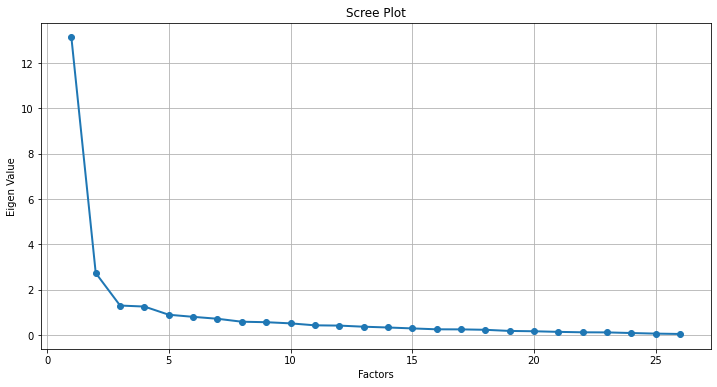

In [11]:
fa = FactorAnalyzer(rotation = 'varimax',n_factors=satisfaction_data.shape[1])
fa.fit(satisfaction_data)
ev,_ = fa.get_eigenvalues()

factor_values = np.arange(satisfaction_data.shape[1]) + 1

plt.figure(figsize= (12,6))

plt.plot(factor_values,ev,'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()